##  `matplotlib` interactivity -- widgets introduction 
_____________________
Widgets:
* eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc.
* can be used  to build interactive UI for  notebooks
* ```ipython 
import ipywidgets as widgets
```
* have their own display `repr` which allows them to be displayed using IPython’s display framework
  - after constructing and returning the widget
  - using `display()` API

#### 1.1. Example: Investing
____________________
The function  `fv` implements

$Compound\,interest = p (1+\frac{i}{n})^{nt} $

where
* p -- initial investment (i.e., present value)
* i -- interest rate
* n -- number of times investment is compounded per year
* t -- total time (in years) of the investment

In [35]:
def fv(p, i, n, t):
    """Returns the future value of an investment   """
    return p * (1 + float(i)/n)**(n * t)

In [36]:
print (f"${fv(10000, 0.08, 1, 10):.2f}")

$21589.25


In [37]:
print (f"${fv(20000, 0.08, 4, 10):.2f}")

$44160.79


#### 1.2. Plotting data onto static graphs
__________________

`plot_fv` -- plots the value of investment for each year that the money is invested

* takes the same set of parameters as our `fv` function 
* uses the `fv` function to calculate the return for every year
* plots the future value for each year onto a simple line graph

In [38]:

import matplotlib.pyplot as plt

In [39]:
def plot_fv(p, i, n, t):
    """Plots the value of an investment over time
    """
    fvs = [fv(p, i, n, year) for year in range(t+1)]
    plt.plot(fvs)
    plt.show()

* Time period of investment out to 30 years:

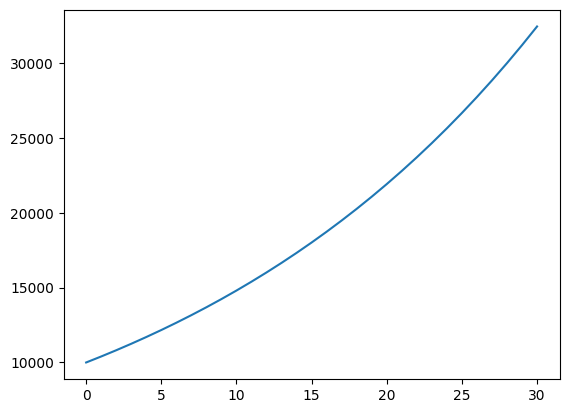

In [40]:
plot_fv(10000, 0.04, 1, 30)

* Parameters can be changed:

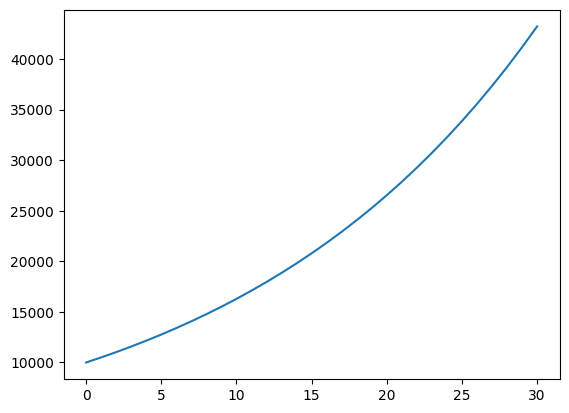

In [41]:
plot_fv(10000, 0.05, 1, 30)

In [42]:
plt.close('all')

## 2.`ipywidgets.interact()` 
_____________________________________


#### 2.1. Adding some interactivity by `interact()` :
_____________________

* automatically creates simple graphical interface (**GUI, UI**) controls for exploring code and data interactively
* is based on a set of **keword** arguments 
* the result will be a UI for interacting with to modify the input to the underlying function
* for `plot_fv`  the output is a matplotlib plot which will be updated with **each** parameter change

In [43]:
import ipywidgets

In [44]:
ipywidgets.interact(plot_fv, p=10000, i=0.24, n=1, t=30);

interactive(children=(IntSlider(value=10000, description='p', max=30000, min=-10000), FloatSlider(value=0.24, …

In [45]:
plt.close('all')

The `interact` call contains: 

1. `plot_fv` function
2. a default values for each parameter in `plot_fv`

 `interact`  figures out a few things: 
 
 * **names** of each of the parameters of the underlying function
 * the type of each parameter allowing to choose the **correct** widget to represent each one
 * the **default value** for each parameter and corresponding widget 

#### 2.2. A control `interact` using tuples:
_____________________

* passing in a tuple for each keyword argument with minimum and maximum values of each slider 
* passing in a step value (optionally)

In [46]:
ipywidgets.interact(plot_fv, p=(0, 100000, 1000), i=(0.01, 0.2, 0.001), n=(1, 12), t=(1, 50));

interactive(children=(IntSlider(value=50000, description='p', max=100000, step=1000), FloatSlider(value=0.105,…

In [47]:
plt.close('all')

#### 2.3. A control `interact` using custom widget objects:
_________________________________
* just call the constructor for each widget
* pass in the options as keyword arguments

In [48]:
present_value = ipywidgets.IntSlider(min=0, max=100000, step=1000, value=10000, 
                                     description='Present Value', continuous_update=True)
interest_rate = ipywidgets.FloatSlider(min=0.01, max=0.2, step=0.001, value=0.047, 
                                       description='Interest Rate', continuous_update=False)
compounds_per_year = ipywidgets.IntSlider(min=1, max=12, value=1, 
                                          description='Compounds/Year', continuous_update=False)
years = ipywidgets.IntSlider(min=1, max=50, value=30, 
                             description='Years to Retirement', continuous_update=False)

In [49]:
ipywidgets.interact(plot_fv, p=present_value, i=interest_rate, n=compounds_per_year, t=years);

interactive(children=(IntSlider(value=10000, description='Present Value', max=100000, step=1000), FloatSlider(…

In [50]:
plt.close('all')

## 3. `ipywidgets.interactive()`
__________________

Useful for reusing the widgets that are produced or accessing the data that is bound to the UI controls:
*   returns a container object that wraps all of the widgets
*   UI can be generated with IPython.display.display
*   provides a way to get the current values of each widgets

In [51]:
# A global figure that can be updated instead of creating a new figure 
# every time the plot_fv function is called.
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [52]:
def plot_fv(p, i, n, t):
    """Plots the value of an investment over time
    """
    fvs = [fv(p, i, n, year) for year in range(t+1)]

    ax = fig.gca()
    ax.plot(fvs, label="p=%d, i=%2f, n=%d, t=%d" % (p, i, n, t))
    # Add a legend and make sure that it's outside of the plot
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    display(fig)

In [53]:
present_value = ipywidgets.IntSlider(min=0, max=100000, step=1000, value=10000, 
                                     description='Present Value:', continuous_update=False)
interest_rate = ipywidgets.FloatSlider(min=0.01, max=0.2, step=0.001, value=0.047, 
                                       description='Interest Rate:', continuous_update=False)
compounds_per_year = ipywidgets.IntSlider(min=1, max=12, value=1, 
                                          description='Compounds/Year:', continuous_update=False)

In [54]:
w = ipywidgets.interactive(plot_fv, p=present_value, i=interest_rate, n=compounds_per_year, t=ipywidgets.fixed(30))

In [55]:
type(w)

ipywidgets.widgets.interaction.interactive

In [56]:
dir(w)

['__annotations__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_active_widgets',
 '_add_notifiers',
 '_all_trait_default_generators',
 '_call_widget_constructed',
 '_comm_changed',
 '_compare',
 '_control_comm',
 '_cross_validation_lock',
 '_default_keys',
 '_descriptors',
 '_dom_classes',
 '_gen_repr_from_keys',
 '_get_embed_state',
 '_get_trait_default_generator',
 '_handle_control_comm_msg',
 '_handle_custom_msg',
 '_handle_msg',
 '_holding_sync',
 '_instance_inits',
 '_is_numpy',
 '_lock_property',
 '_log_default',
 '_model_id',
 '_model_module',
 '_model_module_version',
 '_model_nam

In [57]:
w

interactive(children=(IntSlider(value=10000, continuous_update=False, description='Present Value:', max=100000…

In [58]:
plt.close('all')

In [59]:
from IPython.display import clear_output

# This function will 
# 1.clear the global figure object, 
# 2. clear the output of the current cell, and  
# 3.display a new plot with the current set values from the interface
def clf(*args, **kwargs):
    fig.clf()
    # If we don't call clear_output(), we end up with 2 plots
    clear_output()
    plot_fv(**w.kwargs)
    
button = ipywidgets.Button(description="Reset")    
button.on_click(clf)

w.children += (button,)

In [60]:
from IPython.display import display
display(w)

interactive(children=(IntSlider(value=10000, continuous_update=False, description='Present Value:', max=100000…

In [61]:
plt.close('all')

* using `continuous_update=True`

In [62]:
present_value1 = ipywidgets.IntSlider(min=0, max=100000, step=1000, value=10000, 
                                     description='Present Value:', continuous_update=False)
interest_rate1 = ipywidgets.FloatSlider(min=0.01, max=0.2, step=0.001, value=0.047, 
                                       description='Interest Rate:', continuous_update=True)
compounds_per_year1 = ipywidgets.IntSlider(min=1, max=12, value=1, 
                                          description='Compounds/Year:', continuous_update=True)
w1 = ipywidgets.interactive(plot_fv, p=present_value1, i=interest_rate1, n=compounds_per_year1, t=ipywidgets.fixed(30))

In [63]:
w1.children += (button,)

In [64]:
display(w1)

interactive(children=(IntSlider(value=10000, continuous_update=False, description='Present Value:', max=100000…